<a href="https://colab.research.google.com/github/MuhammadJundullah/Data-Analytics/blob/main/Car_sales_cleaning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import pandas as pd
from google.colab import drive
drive.mount ('/content/gdrive')

Mounted at /content/gdrive


In [4]:
df = pd.read_csv('/content/gdrive/MyDrive/Colab Notebooks/Car_sales/Car_Sales.csv')
df.head()

,Car_id,Date,Customer Name,Gender,Annual Income,Dealer_Name,Company,Model,Engine,Transmission,Color,Price ($),Dealer_No,Body Style,Phone,Dealer_Region
0,C_CND_000001,1/2/2022,Geraldine,Male,13500,Buddy Storbeck's Diesel Service Inc,Ford,Expedition,DoubleÂ Overhead Camshaft,Auto,Black,26000,06457-3834,SUV,8264678,Middletown
1,C_CND_000002,1/2/2022,Gia,Male,1480000,C & M Motors Inc,Dodge,Durango,DoubleÂ Overhead Camshaft,Auto,Black,19000,60504-7114,SUV,6848189,Aurora
2,C_CND_000003,1/2/2022,Gianna,Male,1035000,Capitol KIA,Cadillac,Eldorado,Overhead Camshaft,Manual,Red,31500,38701-8047,Passenger,7298798,Greenville
3,C_CND_000004,1/2/2022,Giselle,Male,13500,Chrysler of Tri-Cities,Toyota,Celica,Overhead Camshaft,Manual,Pale White,14000,99301-3882,SUV,6257557,Pasco
4,C_CND_000005,1/2/2022,Grace,Male,1465000,Chrysler Plymouth,Acura,TL,DoubleÂ Overhead Camshaft,Auto,Red,24500,53546-9427,Hatchback,7081483,Janesville


In [11]:
df.drop(columns=(['Car_id','Phone']), inplace=True)

In [19]:
df.drop(columns=('Customer Name'), inplace=True)

In [25]:
df.isna().sum()

Date             0
Gender           0
Annual Income    0
Dealer_Name      0
Company          0
Model            0
Engine           0
Transmission     0
Color            0
Price ($)        0
Dealer_No        0
Body Style       0
Dealer_Region    0
dtype: int64

In [31]:
df.duplicated().sum()

0

In [32]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23906 entries, 0 to 23905
Data columns (total 13 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Date           23906 non-null  object
 1   Gender         23906 non-null  object
 2   Annual Income  23906 non-null  int64 
 3   Dealer_Name    23906 non-null  object
 4   Company        23906 non-null  object
 5   Model          23906 non-null  object
 6   Engine         23906 non-null  object
 7   Transmission   23906 non-null  object
 8   Color          23906 non-null  object
 9   Price ($)      23906 non-null  int64 
 10  Dealer_No      23906 non-null  object
 11  Body Style     23906 non-null  object
 12  Dealer_Region  23906 non-null  object
dtypes: int64(2), object(11)
memory usage: 2.4+ MB


In [62]:
df.describe()

,Date,Annual Income,Price ($)
count,23906,2.390600e+04,23906.000000
mean,2023-03-01 14:28:10.822387456,8.308403e+05,28090.247846
min,2022-01-02 00:00:00,1.008000e+04,1200.000000
25%,2022-09-20 00:00:00,3.860000e+05,18001.000000
50%,2023-03-13 00:00:00,7.350000e+05,23000.000000
75%,2023-09-08 00:00:00,1.175750e+06,34000.000000
max,2023-12-31 00:00:00,1.120000e+07,85800.000000
std,NaN,7.200064e+05,14788.687608


In [36]:
df['Date'] = pd.to_datetime(df['Date'])

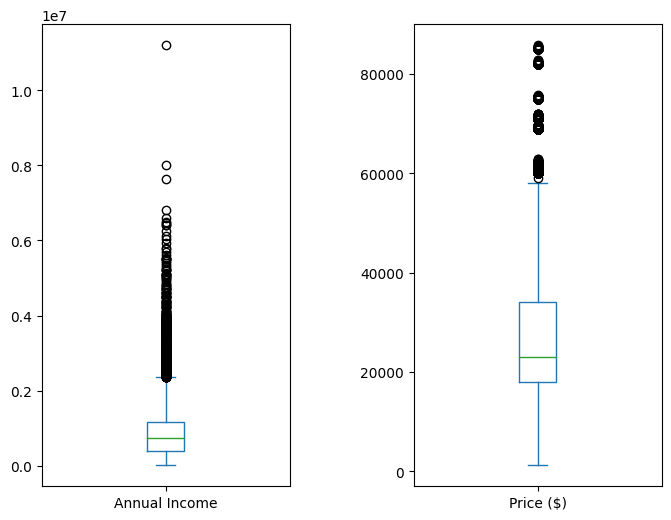

In [50]:
import matplotlib.pyplot as plt
df.select_dtypes(include=['int','float']).plot(subplots=True, layout=(1,2), kind='box', figsize=(8,6))
plt.subplots_adjust(wspace=0.5)

<Axes: xlabel='Annual Income', ylabel='Density'>

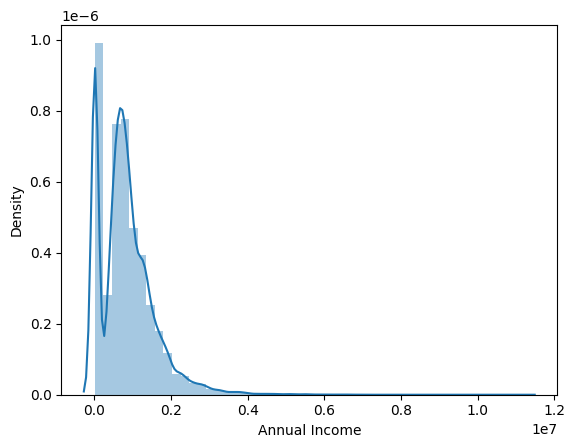

In [61]:
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
sns.distplot(df['Annual Income'])

<Axes: ylabel='Annual Income'>

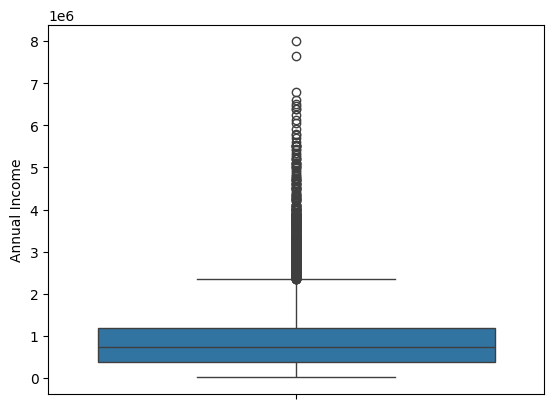

In [71]:
a = df[df['Annual Income'] < 10000000]
sns.boxplot(a['Annual Income'])